In [ ]:
from tensorflow import keras
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.layers import BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from numpy import loadtxt
import tensorflow.keras
from PIL import Image, ImageOps

In [ ]:
#!unzip /content/drive/MyDrive/noisefree.zip

In [ ]:
image_size = 224
batch_size = 32

In [ ]:
testing_dir = '/content/NoiseFree_Original__augmented_SPLIT/val'
input_shape = (image_size, image_size, 3)

In [ ]:
train_datagen = ImageDataGenerator(rescale=1. / 255)

In [ ]:
testing_datagen = ImageDataGenerator(rescale=1. / 255)

testing_generator = testing_datagen.flow_from_directory(
    testing_dir,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    shuffle=False,
    class_mode='categorical')

Found 6366 images belonging to 20 classes.


In [ ]:
plot_var=testing_generator

In [ ]:
#Plot the confusion matrix. Set Normalize = True/False

def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(20,20))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#Print the Target names
from sklearn.metrics import classification_report, confusion_matrix
import itertools 
#shuffle=False
def get_confusion_metrices(model_name):
  target_names = []
  for key in plot_var.class_indices:
      target_names.append(key)

  # print(target_names)

  #Confution Matrix 

  Y_pred = model_name.predict(plot_var)
  y_pred = np.argmax(Y_pred, axis=1)
  print('Confusion Matrix')
  cm = confusion_matrix(plot_var.classes, y_pred)
  plot_confusion_matrix(cm, target_names, title='Confusion Matrix')

  #Print Classification Report
  print('Classification Report')
  print(classification_report(plot_var.classes, y_pred, target_names=target_names))


Confusion Matrix
Normalized confusion matrix
Classification Report
                                   precision    recall  f1-score   support

                Anthracnose_Fruit       0.99      0.98      0.99       467
                 Anthracnose_Leaf       0.98      1.00      0.99       580
           Bacterial_Canker_Fruit       1.00      1.00      1.00       476
            Bacterial_Canker_Leaf       1.00      0.97      0.98       490
          Black_Rot_disease_Fruit       1.00      1.00      1.00       136
                Fruit_borer_Fruit       1.00      1.00      1.00       288
                  Gall_midge_Leaf       1.00      1.00      1.00       209
              Giant_Mealybug_Leaf       0.98      1.00      0.99       245
           Leaf_Coating_Mite_Leaf       0.71      1.00      0.83       335
         Leaf_Cutting_Weevil_Leaf       0.94      0.95      0.95       424
                   Mealybug_Fruit       1.00      1.00      1.00       164
                    Mealybug_Lea

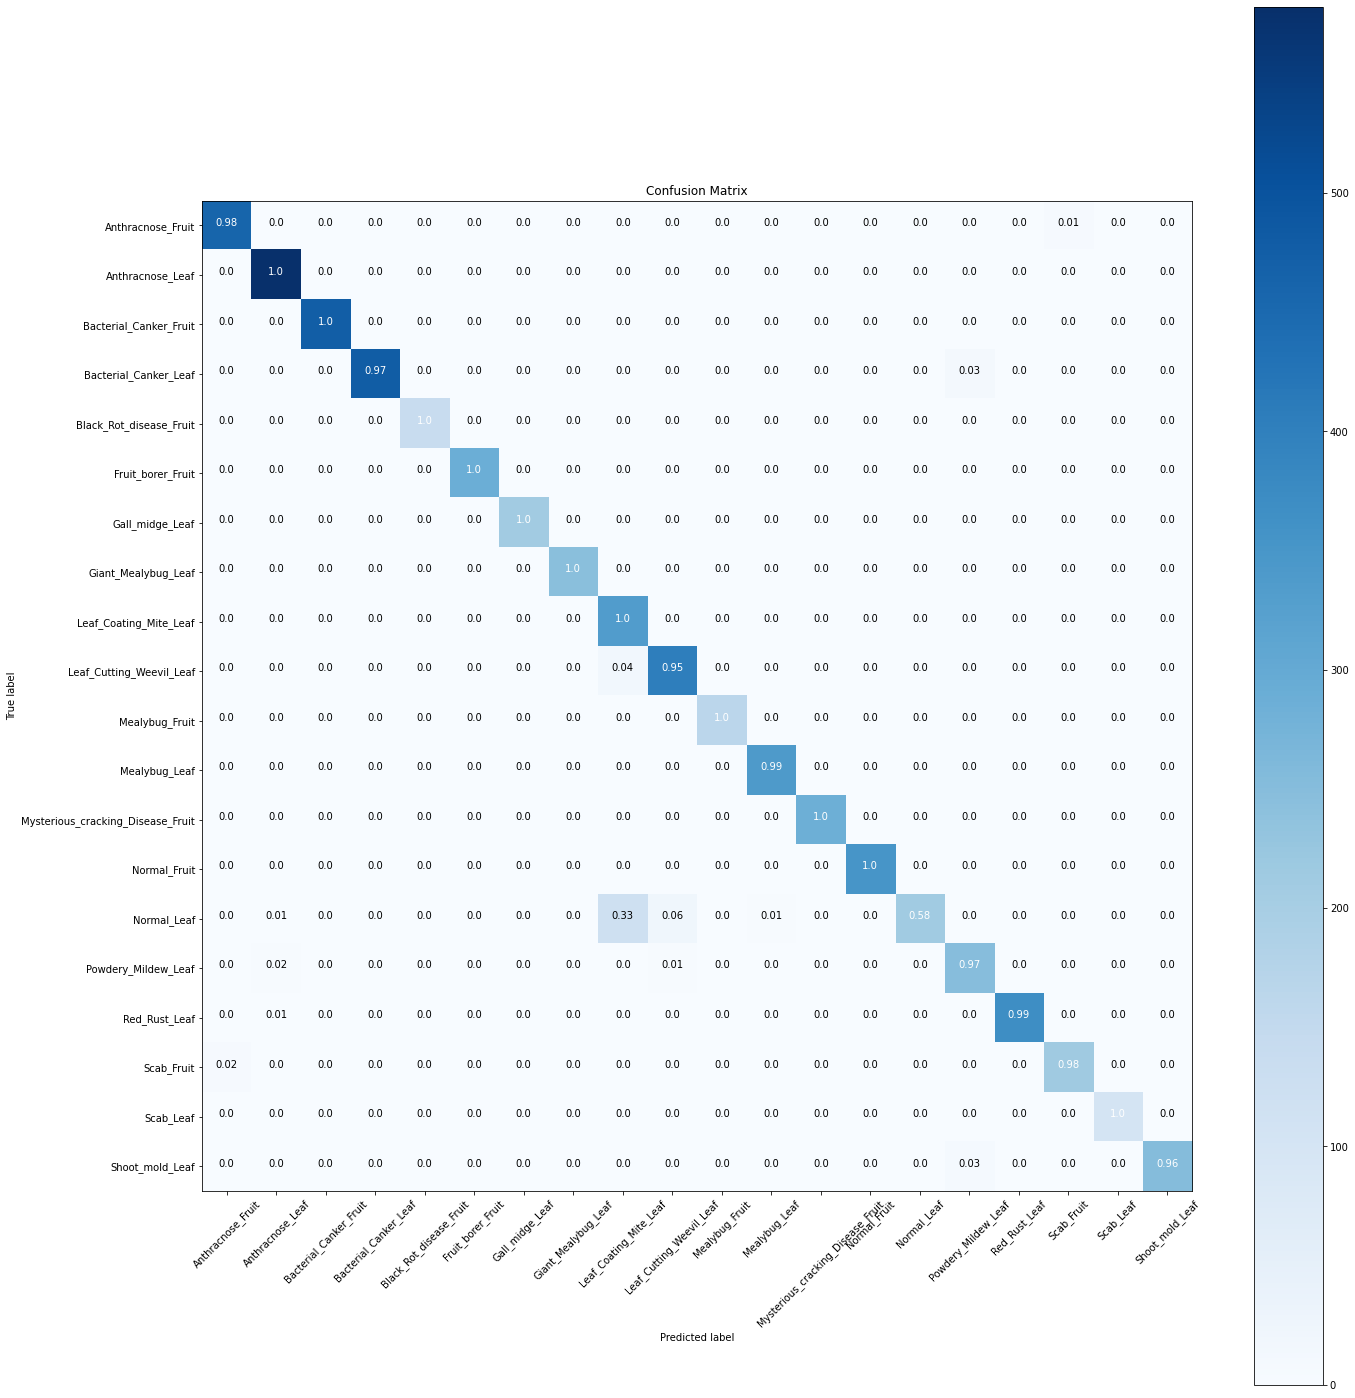

In [ ]:
densenet169 = keras.models.load_model('/content/drive/MyDrive/ALL_H5/densenet.h5')
get_confusion_metrices(densenet169)

Confusion Matrix
Normalized confusion matrix
Classification Report
                                   precision    recall  f1-score   support

                Anthracnose_Fruit       0.92      0.98      0.95       467
                 Anthracnose_Leaf       0.95      0.99      0.97       580
           Bacterial_Canker_Fruit       1.00      0.92      0.96       476
            Bacterial_Canker_Leaf       0.99      0.92      0.95       490
          Black_Rot_disease_Fruit       1.00      0.99      1.00       136
                Fruit_borer_Fruit       1.00      0.99      0.99       288
                  Gall_midge_Leaf       0.98      0.90      0.94       209
              Giant_Mealybug_Leaf       0.99      0.98      0.98       245
           Leaf_Coating_Mite_Leaf       0.65      0.98      0.78       335
         Leaf_Cutting_Weevil_Leaf       0.90      0.90      0.90       424
                   Mealybug_Fruit       1.00      0.99      0.99       164
                    Mealybug_Lea

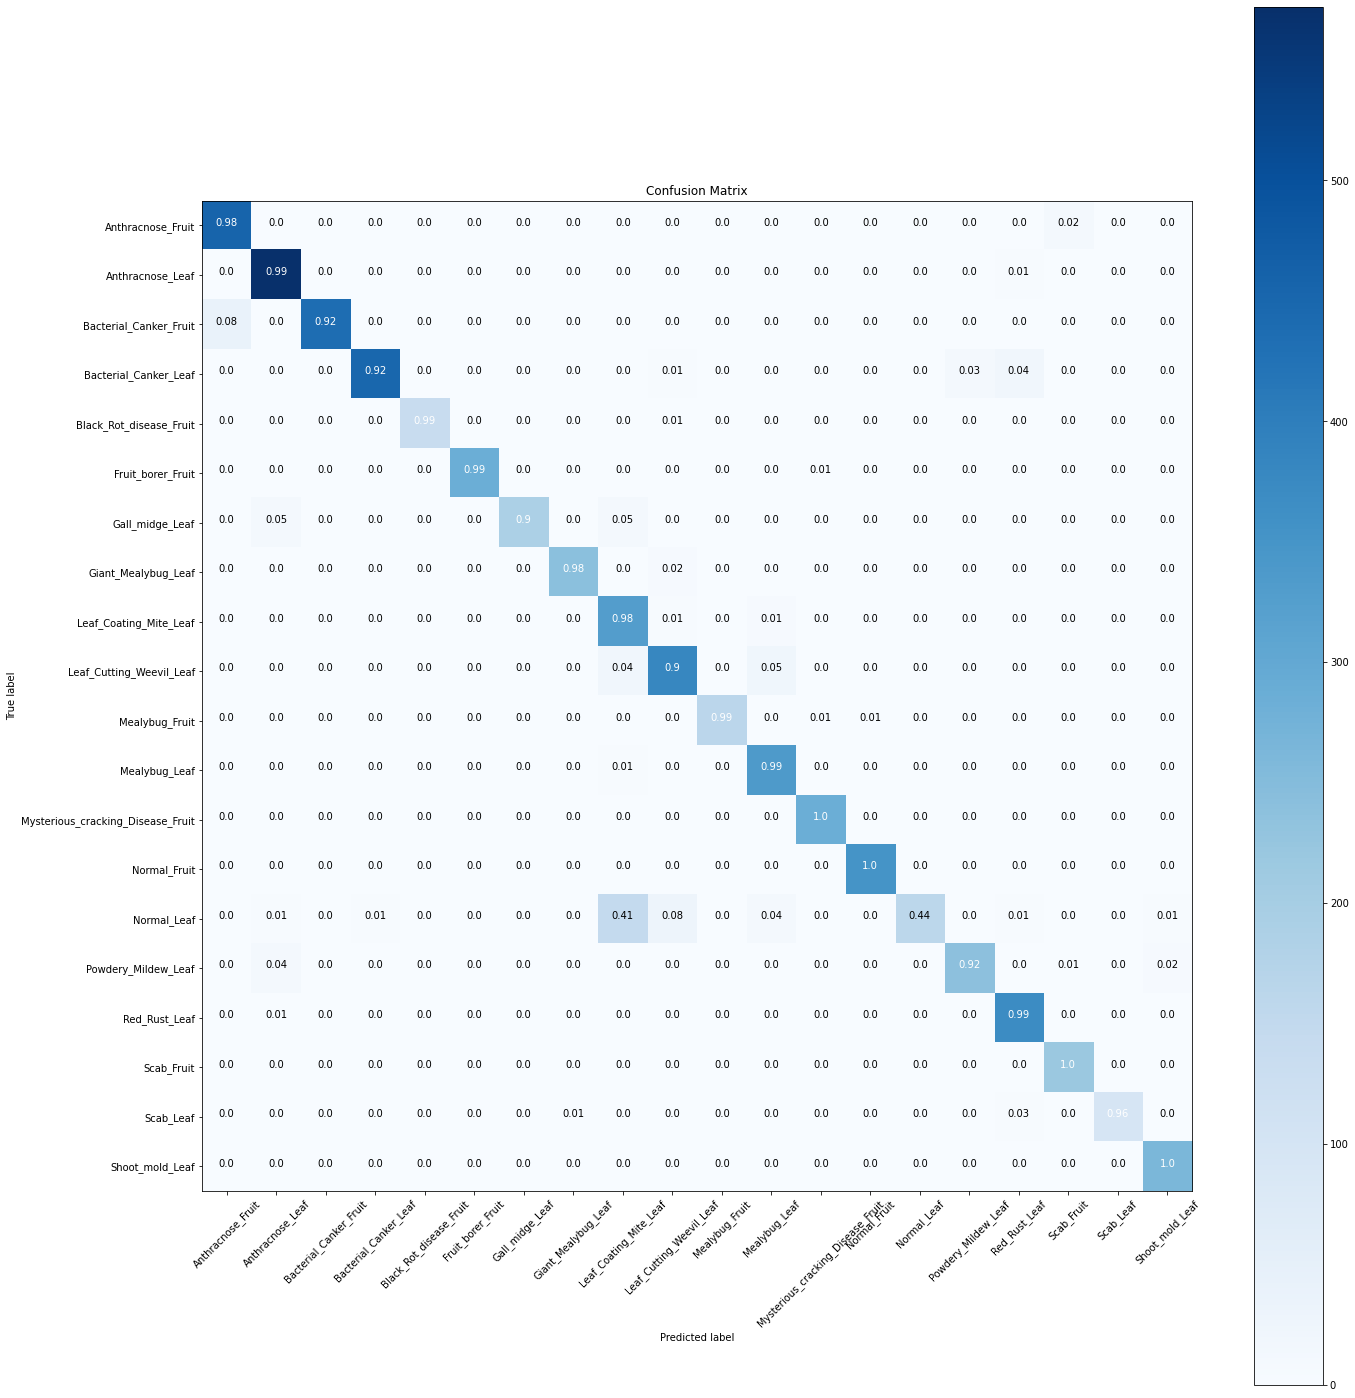

In [ ]:
mobilenetv2 = keras.models.load_model('/content/drive/MyDrive/ALL_H5/mobilenetv2.h5')
get_confusion_metrices(mobilenetv2)

Confusion Matrix
Normalized confusion matrix
Classification Report
                                   precision    recall  f1-score   support

                Anthracnose_Fruit       0.94      1.00      0.97       467
                 Anthracnose_Leaf       0.98      0.96      0.97       580
           Bacterial_Canker_Fruit       1.00      0.95      0.97       476
            Bacterial_Canker_Leaf       0.98      0.96      0.97       490
          Black_Rot_disease_Fruit       1.00      1.00      1.00       136
                Fruit_borer_Fruit       1.00      1.00      1.00       288
                  Gall_midge_Leaf       0.94      0.98      0.96       209
              Giant_Mealybug_Leaf       1.00      0.90      0.95       245
           Leaf_Coating_Mite_Leaf       0.71      0.96      0.81       335
         Leaf_Cutting_Weevil_Leaf       0.87      0.94      0.90       424
                   Mealybug_Fruit       0.99      1.00      1.00       164
                    Mealybug_Lea

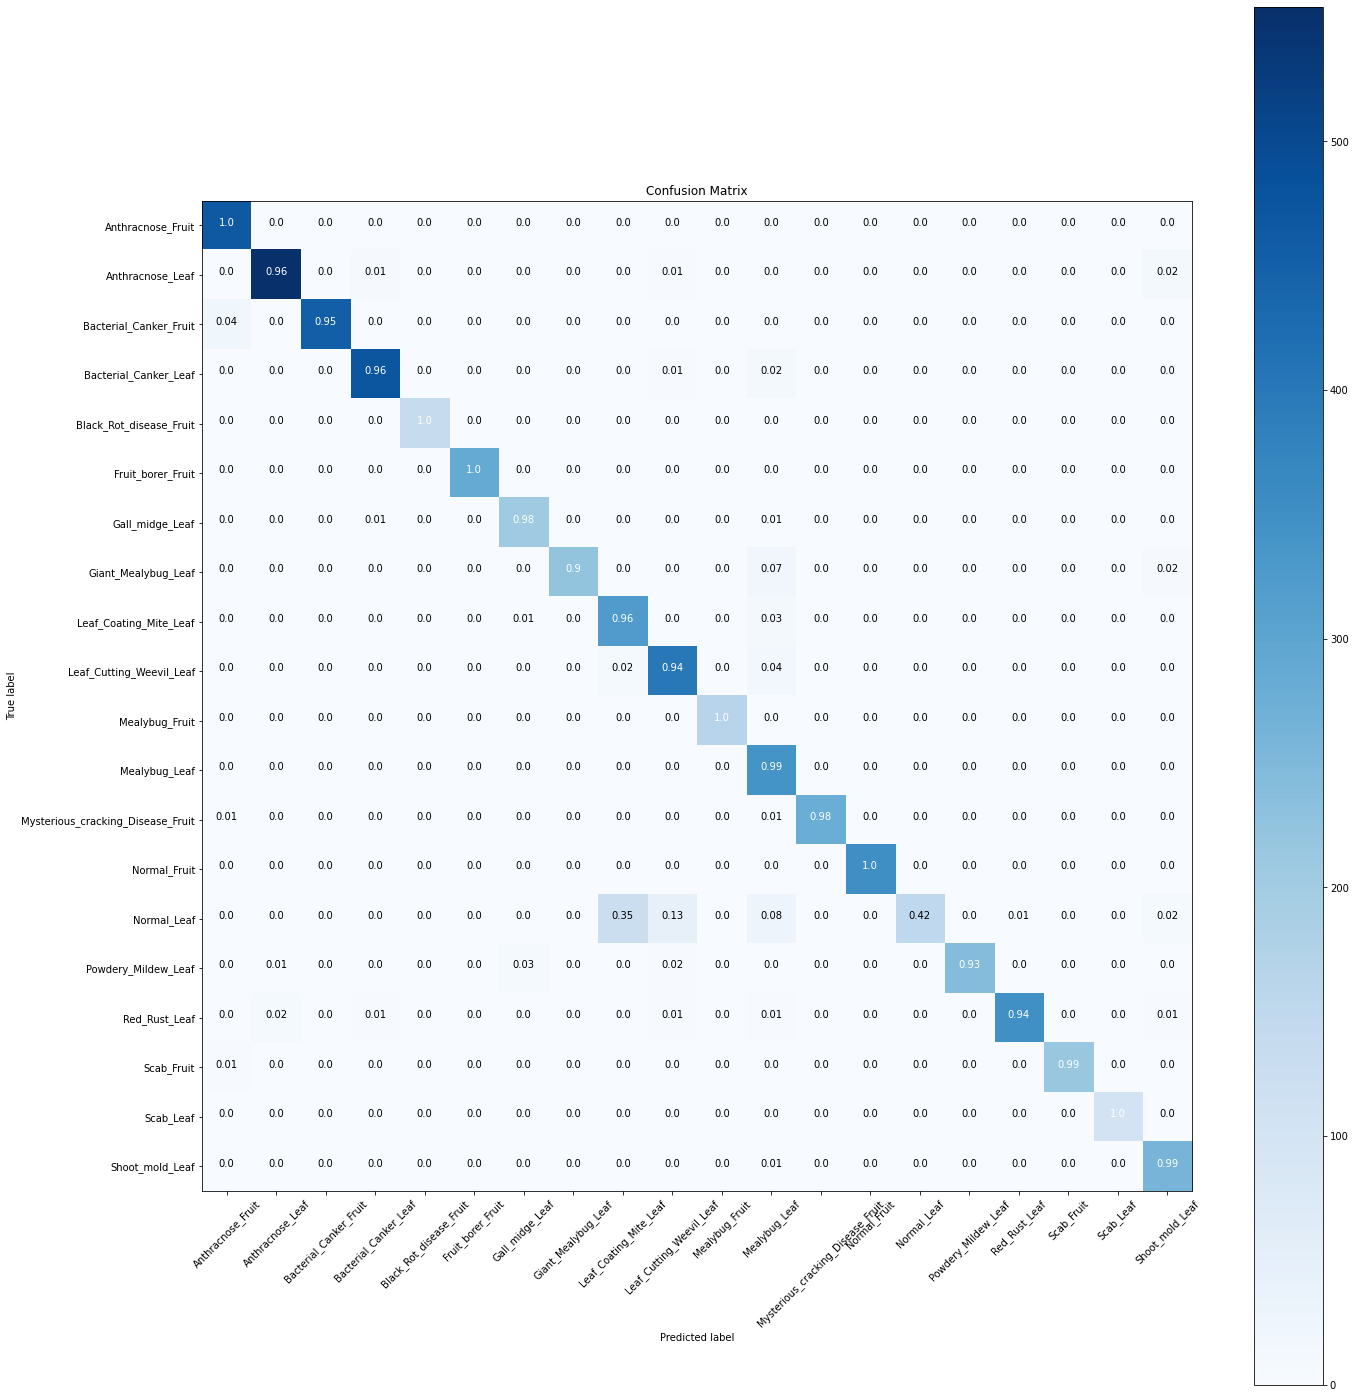

In [ ]:
inceptionv3 = keras.models.load_model('/content/drive/MyDrive/ALL_H5/model_inception.h5')
get_confusion_metrices(inceptionv3)